In [1]:
%cd ..

/Users/kit/Documents/Phys_Working/LLM_SR


/Users/kit/Documents/Phys_Working/LLM_SR/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from kan import create_dataset, KAN
import openai
import LLMSR
from LLMSR.kansr import KANSR
import torch
import os
import matplotlib.pyplot as plt

In [3]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
LLMSR.llm.check_key_limit(client)

2025-03-13 19:30:03,100 - LLMSR.llm - INFO - API key check successful. Remaining limit: None


# Try library

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KAN(width=[1,4,1], grid=7, k=3, seed=10, device=device, symbolic_enabled=False)
kan_sr = KANSR(model=model, client=client)

# create dataset
f = lambda x: (x**3 + torch.pi)**2
ranges = [-2, 2]
dataset = kan_sr.create_dataset(f, n_var=1, ranges=ranges, train_num=10000, test_num=1000)

checkpoint directory created: ./model
saving model version 0.0


2025-03-13 19:30:31,954 - LLMSR.kansr - INFO - Training KAN model with LBFGS optimiser for 200 steps
| train_loss: 5.32e-03 | test_loss: 5.32e-03 | reg: 2.87e+01 | : 100%|█| 200/200 [01:43<00:00,  1.93


saving model version 0.1
Unpruned model. Pruning? True


2025-03-13 19:32:15,776 - LLMSR.kansr - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-03-13 19:32:15,787 - LLMSR.kansr - INFO - Pruned model:
2025-03-13 19:32:15,930 - LLMSR.kansr - INFO - Final train loss: 0.005323893390595913


saving model version 0.2


0.005323893390595913

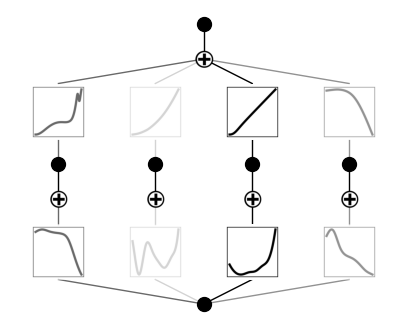

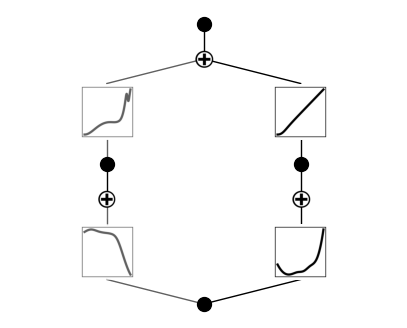

In [5]:
# # train KAN
kan_sr.train_kan(dataset,prune=True, steps=200)


2025-03-13 19:32:16,690 - LLMSR.llm - INFO - API key usage check successful. Current usage: 56.342680946
2025-03-13 19:32:16,691 - LLMSR.kansr - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-03-13 19:32:16,692 - LLMSR.kansr - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-03-13 19:32:16,886 - LLMSR.llm - INFO - API key usage check successful. Current usage: 56.342680946
2025-03-13 19:32:16,887 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-13 19:32:16,887 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


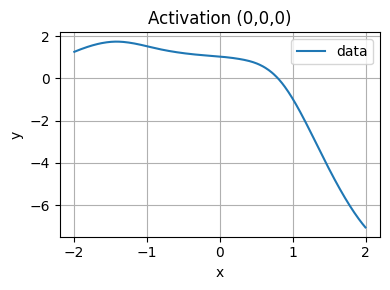

2025-03-13 19:32:16,976 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-13 19:32:17,285 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -22.02849769592285, for constant: [-0.20338983]
2025-03-13 19:32:17,286 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 19:32:18,968 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't provide that information.'
2025-03-13 19:32:21,069 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-13 19:32:21,070 - LLMSR.llmSR - INFO - Initial population best: score=-0.0400126613676548, params=[-0.70588772 -2.46010309 -1.07382431 -1.75051094  1.20620391], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...


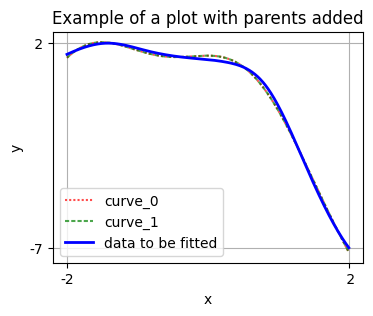

2025-03-13 19:32:21,113 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:32:25,247 - LLMSR.fit - WARNING - curve fitting: Covariance of the parameters could not be estimated
2025-03-13 19:32:25,675 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.0389249362051487, params=[-1.3095557  -2.04757488  0.3094343  -1.07419046 -2.76144395  1.20671142], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5]...
2025-03-13 19:32:25,676 - LLMSR.llmSR - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:32:31,808 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.0400126613676548, params=[-0.70588772 -2.46010309 -1.07382431 -1.75051094  1.20620391], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...
2025-03-13 19:32:31,808 - LLMSR.llmSR - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:32:


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 1
  Success rate: 97.56%

Breakdown by processing stage:
  Api Call: 41 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 1 failed (97.56% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 1

Fitting warnings:
  - covariance estimation: 1
Approximation for (0,0,0): params[0] * np.sin(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5], with score -0.0389249362051487 and parameters [-1.31  -2.048  0.309 -1.074 -2.761  1.207]


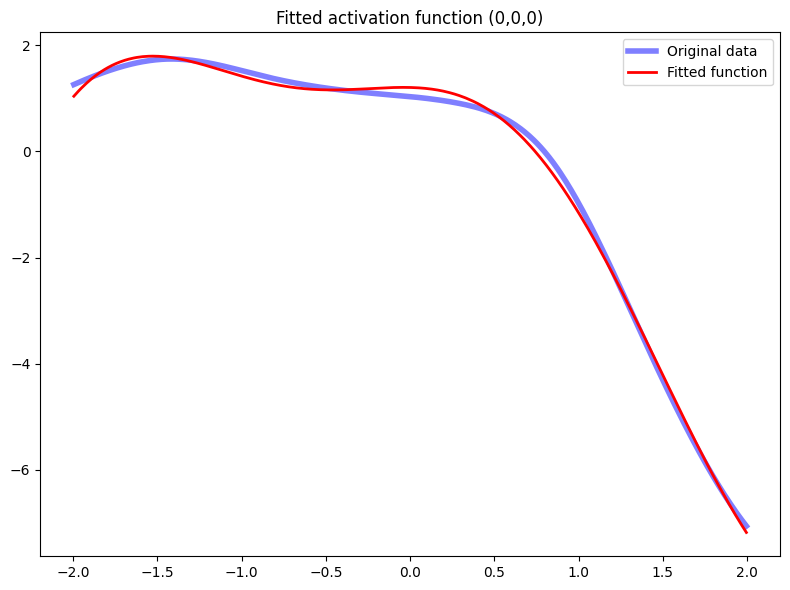

2025-03-13 19:32:34,707 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,1)


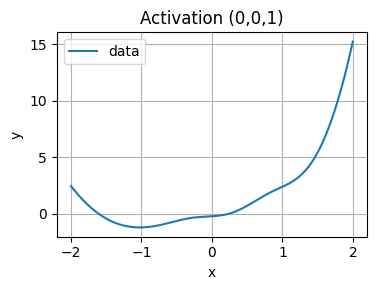

2025-03-13 19:32:34,778 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-13 19:32:34,780 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -7.512549877166748, for constant: [1.64547955]
2025-03-13 19:32:34,780 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 19:32:38,662 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-13 19:32:38,662 - LLMSR.llmSR - INFO - Initial population best: score=-0.35523971915245056, params=[-0.79898003  1.15094296  1.84830807  0.42639859], ansatz: params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3...


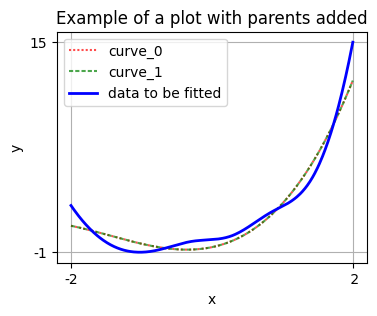

2025-03-13 19:32:38,705 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:32:44,306 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.17260465025901794, params=[ 0.50675603  1.64502698  0.46924594 -1.00877261], ansatz: params[0] * np.exp(params[1] * x) + params[2] * x**2 + params[3]...
2025-03-13 19:32:44,306 - LLMSR.llmSR - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:32:47,735 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.015549208037555218, params=[-1.1384331  -1.23774843 -1.04899935  1.05233588  1.67676651], ansatz: params[0] + params[1] * x**2 + params[2] * x**3 + params[3] * np.exp(params[4] * x)...
2025-03-13 19:32:47,736 - LLMSR.llmSR - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:32:50,087 - LLMSR.llmSR - INFO - Generation 3 best: score=-0.020716683939099312, params=[ 0.20433706  2.25935379 -0.66171282  1.38331663 -0.37841375], ansatz: params[0] * 


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 40 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 0 failed (100.00% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,1): params[0] + params[1] * x**2 + params[2] * x**3 + params[3] * np.exp(params[4] * x), with score -0.015549208037555218 and parameters [-1.138 -1.238 -1.049  1.052  1.677]


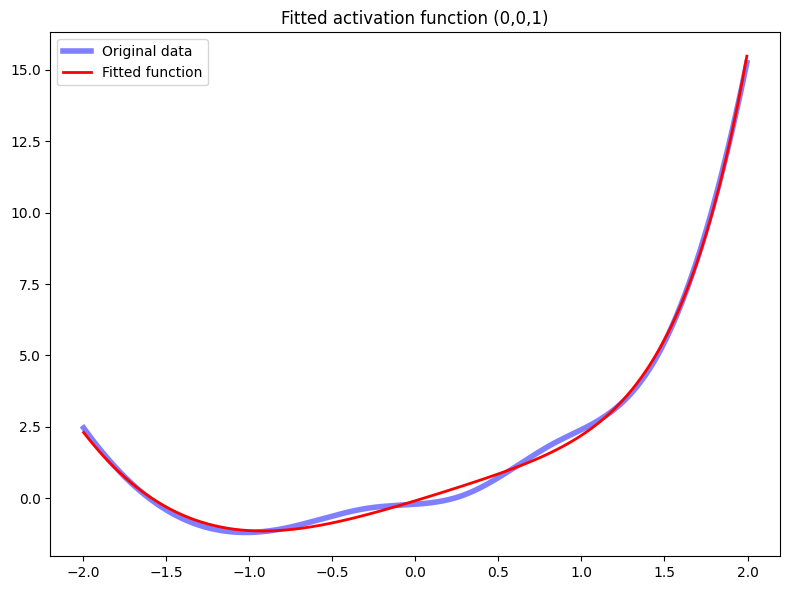

2025-03-13 19:32:50,159 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


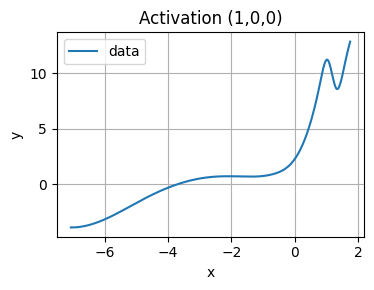

2025-03-13 19:32:50,229 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-13 19:32:50,231 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -6.0016326904296875, for constant: [6.84198949]
2025-03-13 19:32:50,231 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 19:32:59,006 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-13 19:32:59,006 - LLMSR.llmSR - INFO - Initial population best: score=-0.4572705626487732, params=[3.82400224 0.58263907 2.14097583 1.31488984], ansatz: params[0] * np.exp(params[1] * x) + params[2] * np.sin(params[3] * x)...


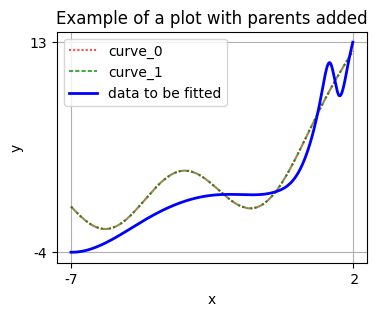

2025-03-13 19:32:59,113 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:33:02,718 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.3058620095252991, params=[ 1.36392881  2.34615235  4.16358673  0.67955949 -0.07632013], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.exp(params[3] * x) + params[4] * x**2...
2025-03-13 19:33:02,719 - LLMSR.llmSR - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:33:09,231 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.22191889584064484, params=[ 4.02612128  0.71591427  1.57510596  4.13667935 -1.90418872 -0.0945891
  0.28087852], ansatz: params[0] * np.exp(params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**2...
2025-03-13 19:33:09,232 - LLMSR.llmSR - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:33:10,962 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 1
  Success rate: 97.56%

Breakdown by processing stage:
  Api Call: 41 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 1 failed (97.56% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 1
Approximation for (1,0,0): params[0] * np.exp(params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**2 + params[6], with score -0.22191889584064484 and parameters [ 4.026  0.716  1.575  4.137 -1.904 -0.095  0.281]


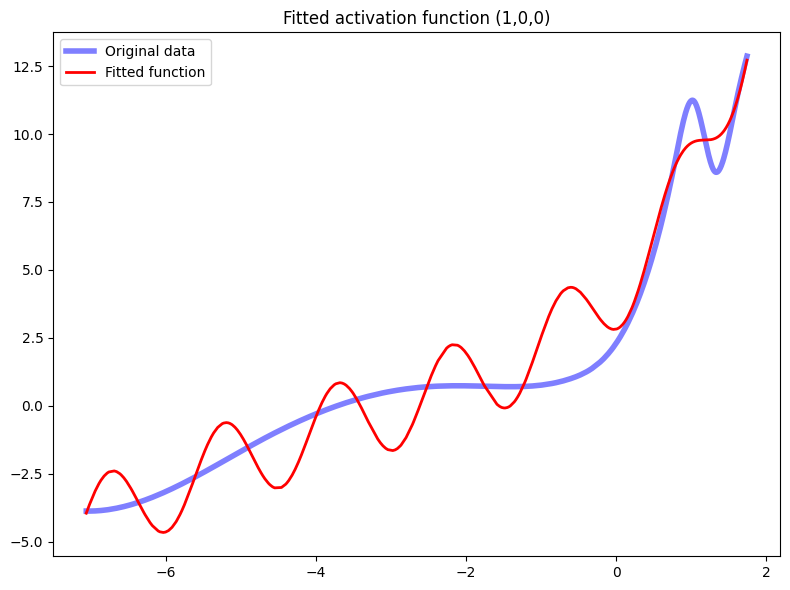

2025-03-13 19:33:12,949 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,1,0)


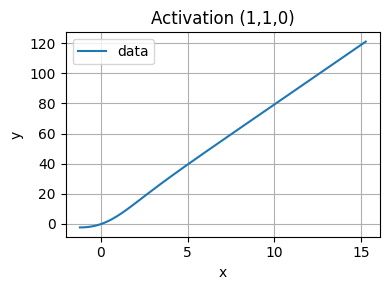

2025-03-13 19:33:13,020 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-13 19:33:13,022 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -46.98598098754883, for constant: [13.9922449]
2025-03-13 19:33:13,022 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 19:33:14,740 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:14,741 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:14,741 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:14,742 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:14,743 - LLMSR.fit - WARNING - curve fitting: Covariance of the parameters could not be estimated
2025-03-13 19:33:14,743 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:14,748 - LLMSR.fit - WARNING - curve fitting: invalid value en

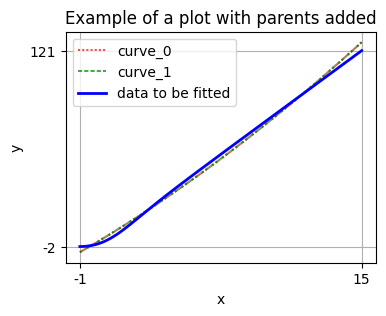

2025-03-13 19:33:15,822 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-13 19:33:17,479 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:17,479 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:17,480 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:17,480 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:17,481 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:17,481 - LLMSR.fit - WARNING - curve fitting: Covariance of the parameters could not be estimated
2025-03-13 19:33:17,482 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:17,614 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 19:33:17,614 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 40 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 0 failed (100.00% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  No errors

Validation issues:
  - nan values: 28

Fitting warnings:
  - invalid sqrt: 11
  - covariance estimation: 28
  - invalid log: 146
Approximation for (1,1,0): params[0] * x**2 + params[1] * x + params[2], with score -0.3185829520225525 and parameters [0.108 6.515 1.732]


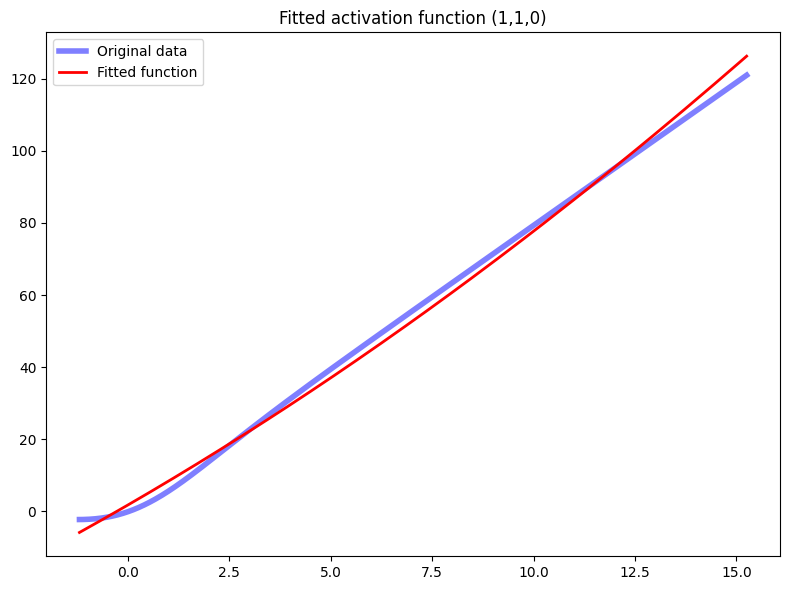

2025-03-13 19:33:28,349 - LLMSR.llmSR - INFO - KAN conversion complete: 4 total connections
2025-03-13 19:33:28,349 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed
2025-03-13 19:33:28,491 - LLMSR.llm - INFO - API key usage check successful. Current usage: 56.592288046
2025-03-13 19:33:28,492 - LLMSR.llmSR - INFO - API key usage whilst this kan_to_symbolic was running: $0.25
2025-03-13 19:33:28,493 - LLMSR.kansr - INFO - Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5], has parameters [-1.3 -2.   0.3 -1.1 -2.8  1.2]
2025-03-13 19:33:28,493 - LLMSR.kansr - INFO - Approximation for (0, 0, 1): params[0] + params[1] * x**2 + params[2] * x**3 + params[3] * np.exp(params[4] * x), has parameters [-1.1 -1.2 -1.   1.1  1.7]
2025-03-13 19:33:28,493 - LLMSR.kansr - INFO - Approximation for (1, 0, 0): params[0] * np.exp(params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[

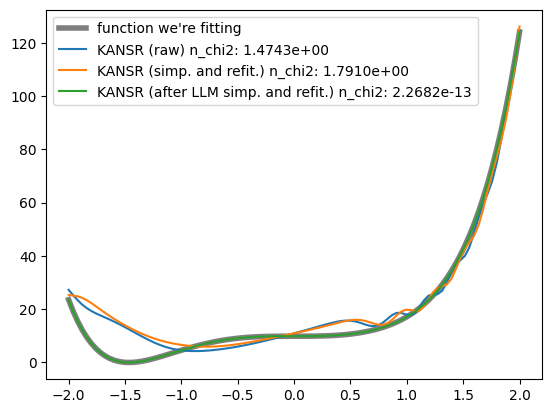

2025-03-13 19:36:56,442 - LLMSR.kansr - INFO - 
###############################
# Raw and Refitted Results for output 0 (4sf): #
###############################
2025-03-13 19:36:56,443 - LLMSR.kansr - INFO - Raw expression n_chi2 1.474e+00: -6.835*x0**3 - 8.064*x0**2 + 0.166*(0.8475*x0**3 + x0**2 - 0.8502*exp(1.677*x0) + 0.9198)**2 - 0.7213*(0.1121*x0**3 - 0.389*x0**2 - x0 + 0.4742*sin(2.048*x0) + 0.437)**2 + 6.856*exp(1.677*x0) + 9.552*exp(0.2215*x0**3 - 0.769*x0**2 - 1.977*x0 + 0.9375*sin(2.048*x0)) + 1.575*sin(1.28*x0**3 - 4.444*x0**2 - 11.42*x0 + 5.417*sin(2.048*x0) + 3.088) - 5.404
2025-03-13 19:36:56,443 - LLMSR.kansr - INFO - Refitted expression n_chi2 1.791e+00: -6.835*x0**3 - 8.064*x0**2 + 0.166*(0.8475*x0**3 + x0**2 - 0.8502*exp(1.677*x0) + 0.9198)**2 - 0.7213*(0.1121*x0**3 - 0.389*x0**2 - x0 + 0.4742*sin(2.048*x0) + 0.437)**2 + 6.856*exp(1.677*x0) + 9.552*exp(0.2215*x0**3 - 0.769*x0**2 - 1.977*x0 + 0.9375*sin(2.048*x0)) + 1.575*sin(1.28*x0**3 - 4.444*x0**2 - 10*x0 + 5.417*si

In [6]:
# fit KAN
best_expressions, best_chi_squareds, results_all_dicts, all_results_sorted = kan_sr.get_symbolic(population=10, generations=4, plot_parents=True, demonstrate_parent_plotting=True)

2025-03-13 19:45:24,445 - LLMSR.kansr - INFO - Using internal dataset for plotting
2025-03-13 19:45:24,446 - LLMSR.kansr - INFO - Using provided ranges: [-2, 2]
2025-03-13 19:45:24,447 - LLMSR.kansr - INFO - Using self.f function for ground truth
2025-03-13 19:45:24,456 - LLMSR.kansr - INFO - Plotting raw expression
2025-03-13 19:45:24,457 - LLMSR.kansr - INFO - Plotting simplified and refitted/pruned raw expression
2025-03-13 19:45:24,458 - LLMSR.kansr - INFO - Plotting simplified by LLM expression
2025-03-13 19:45:24,459 - LLMSR.kansr - INFO - Argument x of learned function are arraylike, NOT x0, x1, etc.
2025-03-13 19:45:24,460 - LLMSR.kansr - WARNING - Error in processing symbolic KAN directly to python function: KANSR._find_optimised_for_full_python_kan_function() got multiple values for argument 'try_jax'
2025-03-13 19:45:24,460 - LLMSR.kansr - WARNING - Error processing generated function: unsupported operand type(s) for -: 'float' and 'NoneType'


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

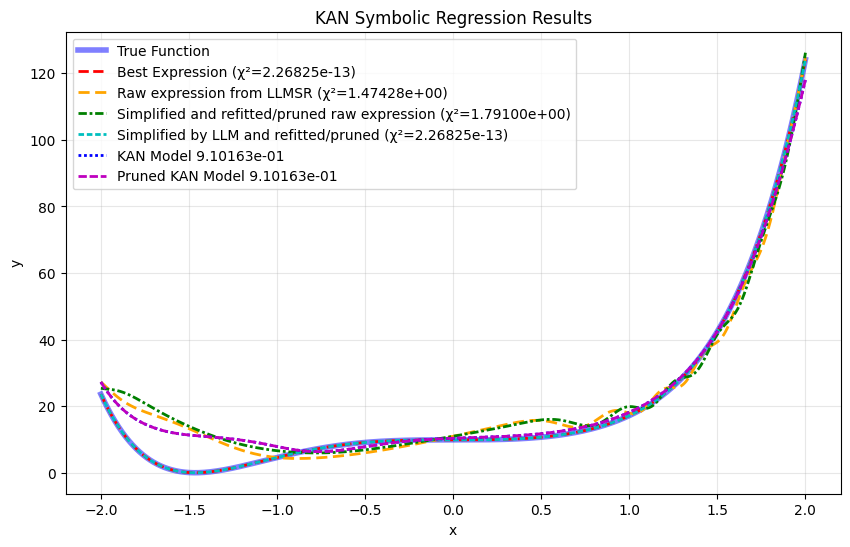

In [9]:
kan_sr.plot_results(ranges, kan_sr.results_all_dicts[0],title="KAN Symbolic Regression Results", plot_using_generate_f=True)

In [17]:
best_expressions, best_chi_squareds, results_all_dicts

(['5.02928795649652*x0**4 + 5.7635072182088*x0**3 - 6.30579157438488*x0**2 + 0.771673936874222*x0 + 11.0110812042574'],
 [0.053780339658260345],
 [{'raw_expression': '-11.3188246094408*x0**3 - 29.6804520735595*x0**2 - 44.2073000021093*x0 + 8237.71588018229*(-0.0133268628813515*x0**2 - 0.909412169504952*np.sin(0.583767336297769*x0) + np.tanh(0.529854070923374*x0) + 0.0149699703145007)**3 + 6.34428104224309*(-0.227043610192679*x0**3 - 0.595358371867609*x0**2 - 0.8867515255054*x0 + 0.994976295888124*np.exp(1.09982855106399*x0) - 0.0213802024691279*np.sin(5.05503079371796*x0) - 1)**2 + 49.6026387800626*np.exp(1.09982855106399*x0) - 1.06586907095523*np.sin(5.05503079371796*x0) - 0.529869623008788*np.cos(1.2913543414044*x0**2 + 88.1207650796443*np.sin(0.583767336297769*x0) - 96.8985989351933*np.tanh(0.529854070923374*x0) - 1.45056914957656) - 4.98711961638412*np.tanh(2.46065780802548*x0**2 + 167.912897095765*np.sin(0.583767336297769*x0) - 184.638937905538*np.tanh(0.529854070923374*x0) - 1.84

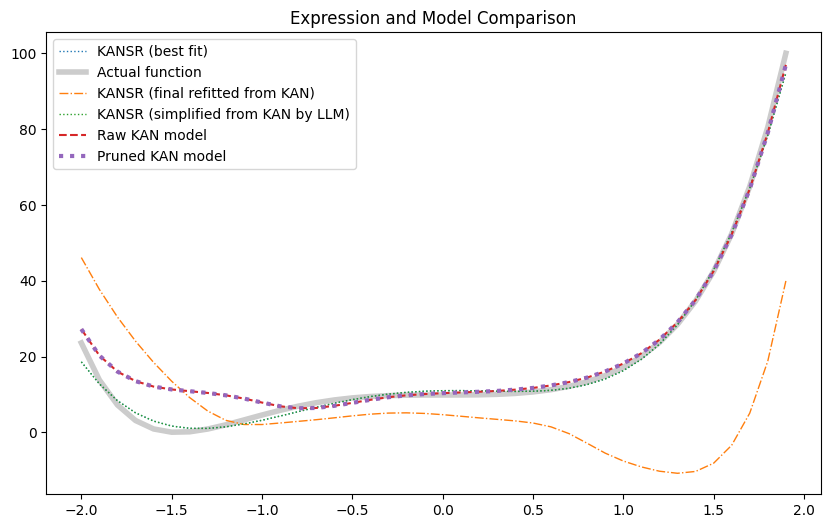

In [18]:
import numpy as np
f_orig = lambda x0: (x0**3 + torch.pi)**2
f_kan_fitted= lambda x0: eval(results_all_dicts[0]['final_refitted_expression'])
f_llm_fitted = lambda x0: eval(results_all_dicts[0]['final_LLM_expression'])
f_best_fitted = lambda x0: eval(best_expressions[0])
xs = np.arange(ranges[0], ranges[1], .1)

# Convert to tensor for model evaluation
xs_tensor = torch.tensor(xs, dtype=torch.float32).unsqueeze(1).to(device)

# Evaluate the KAN models
raw_kan_outputs = kan_sr.raw_model(xs_tensor).cpu().detach().numpy().flatten()
pruned_kan_outputs = kan_sr.model(xs_tensor).cpu().detach().numpy().flatten()

# Plot all expressions and models
plt.figure(figsize=(10, 6))
plt.plot(xs, [f_best_fitted(x) for x in xs], linestyle=':', label="KANSR (best fit)", linewidth=1)  
plt.plot(xs, [f_orig(x) for x in xs], linestyle='-', c='black', label="Actual function", linewidth=4, alpha=0.2)
plt.plot(xs, [f_kan_fitted(x) for x in xs], linestyle='-.', label="KANSR (final refitted from KAN)", linewidth=1)
plt.plot(xs, [f_llm_fitted(x) for x in xs], linestyle=':', label="KANSR (simplified from KAN by LLM)", linewidth=1)
plt.plot(xs, raw_kan_outputs, linestyle='--', label="Raw KAN model", linewidth=1.5)
plt.plot(xs, pruned_kan_outputs, linestyle=':', label="Pruned KAN model", linewidth=3)
plt.legend()
plt.title("Expression and Model Comparison")
plt.show()


# Try $e^{1.83169-3.35509/x}$

2025-03-13 18:26:49,036 - LLMSR.kansr - INFO - Training KAN model with LBFGS optimiser for 500 steps


cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.80e-06 | test_loss: 4.76e-06 | reg: 9.12e+00 | : 100%|█| 500/500 [01:24<00:00,  5.93


saving model version 0.1
Unpruned model. Pruning? True


2025-03-13 18:28:13,584 - LLMSR.kansr - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-03-13 18:28:13,593 - LLMSR.kansr - INFO - Pruned model:
2025-03-13 18:28:13,664 - LLMSR.kansr - INFO - Final train loss: 4.801643626706209e-06
2025-03-13 18:28:13,665 - LLMSR.kansr - INFO - Trained model:


saving model version 0.2


2025-03-13 18:28:13,884 - LLMSR.kansr - INFO - Pruned model:
2025-03-13 18:28:14,283 - LLMSR.llm - INFO - API key usage check successful. Current usage: 55.119323446
2025-03-13 18:28:14,284 - LLMSR.kansr - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-03-13 18:28:14,284 - LLMSR.kansr - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-03-13 18:28:14,391 - LLMSR.llm - INFO - API key usage check successful. Current usage: 55.119323446
2025-03-13 18:28:14,392 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-13 18:28:14,392 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


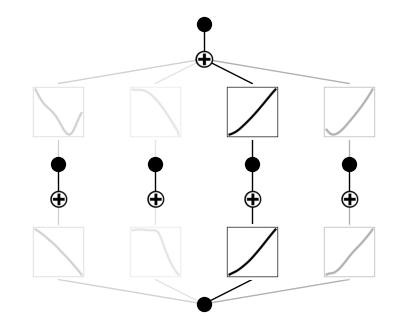

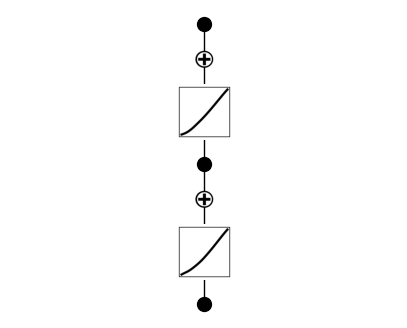

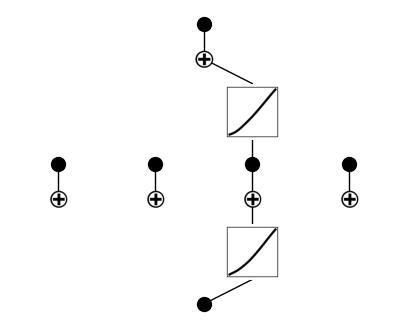

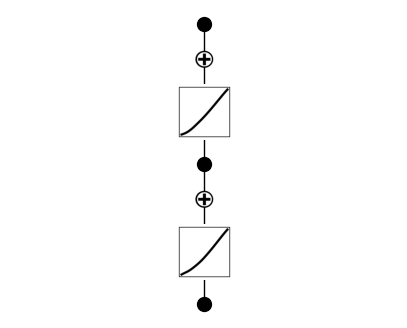

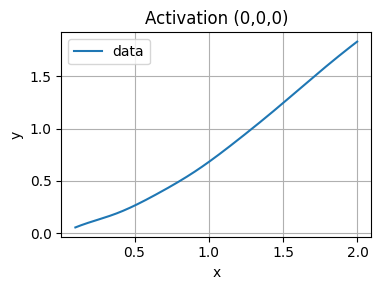

2025-03-13 18:28:14,880 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-13 18:28:14,881 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -1.392931342124939, for constant: [0.79882429]
2025-03-13 18:28:14,882 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 18:28:21,490 - LLMSR.llmSR - INFO - Generated 25 individuals
2025-03-13 18:28:21,496 - LLMSR.llmSR - INFO - Initial population best: score=-0.00045989485806785524, params=[0.65466366 1.48998307 0.0349917 ], ansatz: params[0] * np.power(x, params[1]) + params[2]...
2025-03-13 18:28:21,499 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-13 18:28:21,501 - LLMSR.llmSR - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 25
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 25 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 25 succeeded, 0 failed (100.00% success)
  Function Conversion: 25 succeeded, 0 failed (100.00% success)
  Curve Fitting: 25 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * np.power(x, params[1]) + params[2], with score -0.00045989485806785524 and parameters [0.655 1.49  0.035]


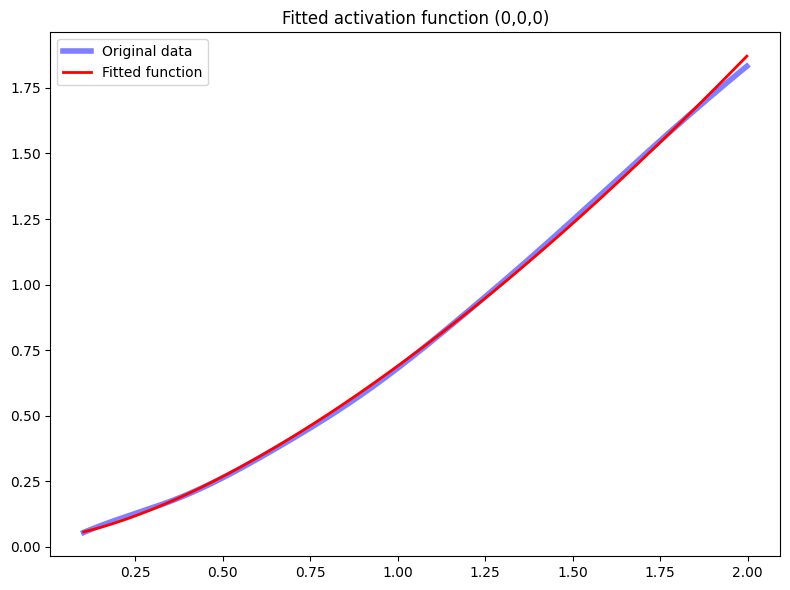

2025-03-13 18:28:21,571 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


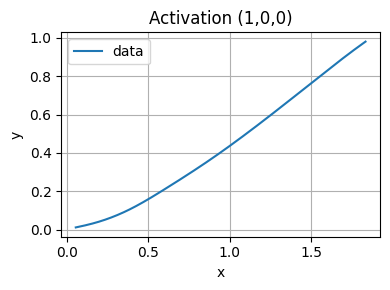

2025-03-13 18:28:21,803 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-13 18:28:21,805 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -1.8484982252120972, for constant: [0.35598678]
2025-03-13 18:28:21,805 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 18:28:23,723 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Generated 25 individuals
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Initial population best: score=-0.0001646207965677604, params=[-0.39753642  2.01820503  0.8765595 ], ansatz: params[0] * np.log(params[1] * x + 1) + params[2] * x...
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 25
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 25 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 25 succeeded, 0 failed (100.00% success)
  Function Conversion: 25 succeeded, 0 failed (100.00% success)
  Curve Fitting: 25 succeeded, 0 failed (100.00% success)

Error types:
  No errors

Fitting warnings:
  - invalid log: 1
Approximation for (1,0,0): params[0] * np.log(params[1] * x + 1) + params[2] * x, with score -0.0001646207965677604 and parameters [-0.398  2.018  0.877]


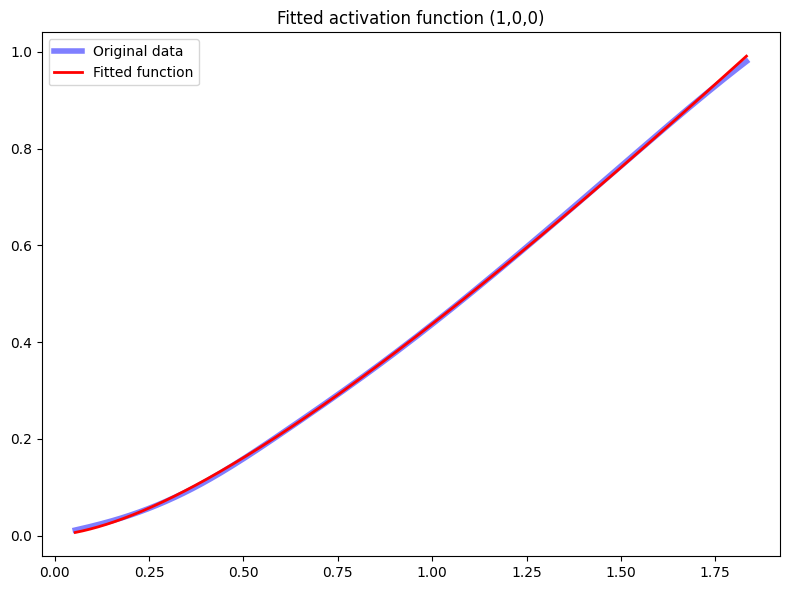

2025-03-13 18:28:27,951 - LLMSR.llmSR - INFO - KAN conversion complete: 2 total connections
2025-03-13 18:28:27,952 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 2 processed
2025-03-13 18:28:28,083 - LLMSR.llm - INFO - API key usage check successful. Current usage: 55.119323446
2025-03-13 18:28:28,083 - LLMSR.llmSR - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-03-13 18:28:28,084 - LLMSR.kansr - INFO - Approximation for (0, 0, 0): params[0] * np.power(x, params[1]) + params[2], has parameters [0.7 1.5 0. ]
2025-03-13 18:28:28,084 - LLMSR.kansr - INFO - Approximation for (1, 0, 0): params[0] * np.log(params[1] * x + 1) + params[2] * x, has parameters [-0.4  2.   0.9]
2025-03-13 18:28:28,085 - LLMSR.kansr - INFO - Building expression tree
2025-03-13 18:28:28,085 - LLMSR.kansr - INFO - KAN Connection: (0, 0, 0), Best Expression: 0.6546636579739875 * np.power( x , 1.4899830700918997) + 0.0349917039098581, Score: -0.00046
2025-03-13 18:28:28,08

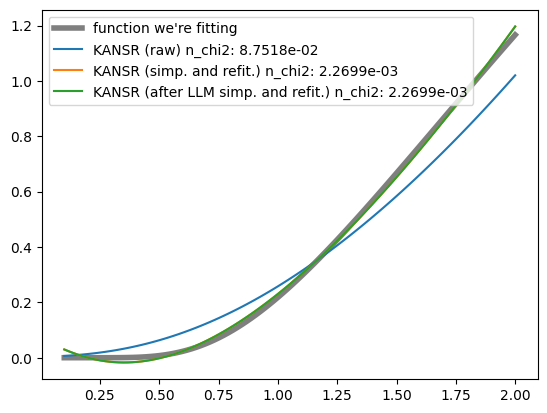

2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - 
###############################
# Final formula for output 0: #
###############################
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - Best expression n_chi2 2.270e-03 from rawrefitted fit: 1.17500218265285*x0**1.20591454314111 - 0.899306555094654*log(1.67209081227281*x0**1.20591454314111 + 0.804907362500822) - 0.129081796109814
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - Round to 4sf: 1.175*x0**1.206 - 0.8993*log(1.672*x0**1.206 + 0.8049) - 0.1291
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - 

###############################
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - # Top 10 Best Fits Overall #
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - ###############################
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - 

###############################
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - # Top 10 Best Fits Overall #
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - ###############################
2025-03-13 18:29

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create dataset - must be a torch function
f2 = lambda x: torch.exp(1.83169-3.35509/x)
ranges = [0.1, 2.]
# Run the complete pipeline
# Initialize a new KANSR instance
kansr2 = KANSR(
    client=client,
    width=[1, 4, 1],  # Using a slightly different architecture
    grid=7,
    k=3,
    seed=17,
    symbolic_enabled=False
)
results = kansr2.run_complete_pipeline(
    client=client,
    f=f2,
    ranges=ranges,
    train_steps=500,
    generations=10,
    gpt_model="openai/gpt-4o",
    node_th=0.2,
    edge_th=0.2,
    optimiser="LBFGS",
    population=25,
    temperature=0.1,
    verbose=1,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)
